In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("cell_samples.csv")

In [ ]:
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 11)

In [ ]:
df.describe

<bound method NDFrame.describe of           ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl Mit  Class
0    1000025      5         1          1  ...           3         1   1      2
1    1002945      5         4          4  ...           3         2   1      2
2    1015425      3         1          1  ...           3         1   1      2
3    1016277      6         8          8  ...           3         7   1      2
4    1017023      4         1          1  ...           3         1   1      2
..       ...    ...       ...        ...  ...         ...       ...  ..    ...
694   776715      3         1          1  ...           1         1   1      2
695   841769      2         1          1  ...           1         1   1      2
696   888820      5        10         10  ...           8        10   2      4
697   897471      4         8          6  ...          10         6   1      4
698   897471      4         8          8  ...          10         4   1      4

[699 rows x 11 co

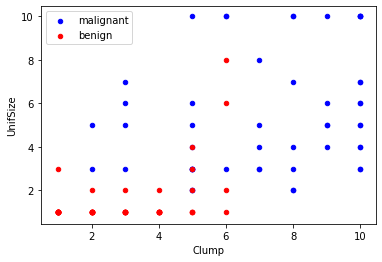

In [ ]:
ax = df[df["Class"] ==4][0:50].plot(kind='scatter', x="Clump", y="UnifSize", color= 'blue', label='malignant')
df[df['Class'] == 2][0:50].plot(kind = 'scatter', x="Clump", y="UnifSize", color= 'red', label='benign', ax=ax)
plt.show()

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df["BareNuc"] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df["Class"])
y[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print('Train set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Train set : (546, 9) (546,)
Test set : (137, 9) (137,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [ ]:
y_test[0:5]

array([2, 4, 2, 4, 2])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis] #axis =1 for column, 0 for rows
    print("Normalize confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


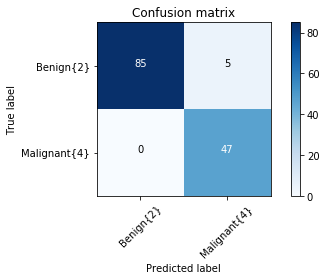

In [ ]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [2,4])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))

#Plot non normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Benign{2}", 'Malignant{4}'], normalize=False, title='Confusion matrix')


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average = 'weighted')


0.9639038982104676

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365

In [ ]:
clf2 = svm.SVC(kernel= 
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Avg F1-Score: %.4f" %f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" %jaccard_similarity_score(y_test, yhat2))

Avg F1-Score: 0.9639
Jaccard score: 0.9635


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
